In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
class Config: pass

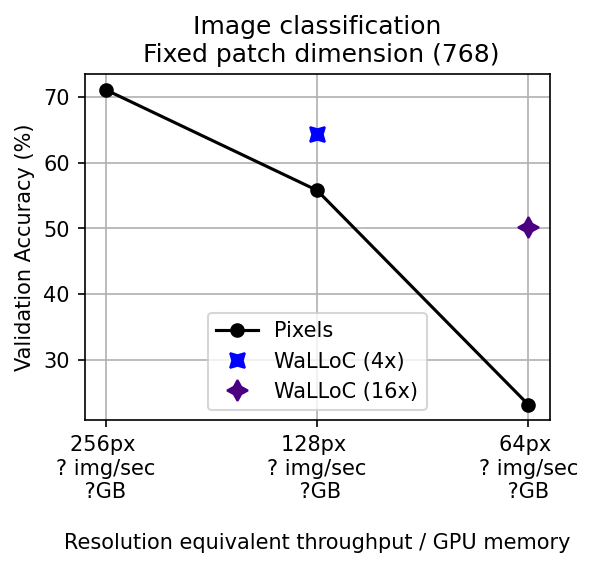

In [390]:
seq_length = [1, 2, 3]

# pixels_acc = [50.614, 64.114, 71.13,]
pixels_acc = [23.104, 55.794, 71.13]
# walloc_4x_acc = [np.nan, 64.336, 71.036]
walloc_4x_acc = [np.nan, 64.336, np.nan]
# walloc_16x_acc = [50.266, 63.96, np.nan]
walloc_16x_acc = [50.266, np.nan, np.nan]

plt.figure(figsize=(4, 3), dpi=150)
plt.plot(seq_length, pixels_acc, marker='o', label='Pixels', color='black')
ax = plt.gca()
ax.plot(seq_length, walloc_4x_acc, marker=(4, 1, 45), label='WaLLoC (4x)', color='blue', linestyle='none', markersize=10)
ax.plot(seq_length, walloc_16x_acc, marker=(4, 1, 0), label='WaLLoC (16x)', color='indigo', linestyle='none', markersize=10)

ax.set_title('Image classification\n Fixed patch dimension (768)')
ax.set_xlabel('\nResolution equivalent throughput / GPU memory')
ax.set_ylabel('Validation Accuracy (%)')
ax.grid(True)
ax.set_xticks(patch_sizes)
ax.set_xticklabels(['64px \n? img/sec\n ?GB ', '128px \n? img/sec\n ?GB', '256px \n? img/sec\n ?GB '])
ax.legend(loc='lower center')
ax.invert_xaxis()

# ax.text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING', 
#          fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30,
#          transform=plt.gca().transAxes);

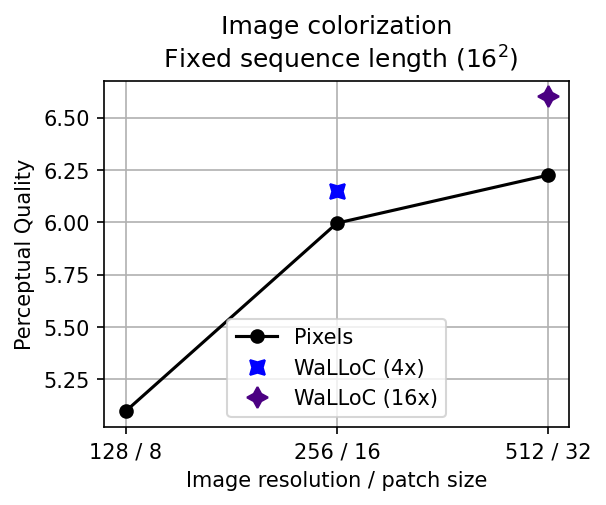

In [404]:
img_res_patch_size = [1, 2, 3]
pixels_quality =  [5.096641, 5.995810, 6.225237]
# walloc_4x_quality = [np.nan, 6.149699, 	6.224286]
walloc_4x_quality = [np.nan, 6.149699, 	np.nan]
walloc_16x_quality = [np.nan, np.nan, 6.601486]

plt.figure(figsize=(4, 3), dpi=150)
plt.plot(img_res_patch_size, pixels_quality, marker='o', label='Pixels', color='black')
ax = plt.gca()
ax.plot(img_res_patch_size, walloc_4x_quality, marker=(4, 1, 45), label='WaLLoC (4x)', color='blue', linestyle='none', markersize=10)
ax.plot(img_res_patch_size, walloc_16x_quality, marker=(4, 1, 0), label='WaLLoC (16x)', color='indigo', linestyle='none', markersize=10)

ax.set_title('Image colorization\n Fixed sequence length $\\left(16^2\\right)$')
ax.set_xlabel('Image resolution / patch size')
ax.set_ylabel('Perceptual Quality')
ax.grid(True)
ax.set_xticks(img_res_patch_size)
ax.set_xticklabels(['128 / 8', '256 / 16', '512 / 32'])
ax.legend(loc='lower center')

# ax.text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING', 
#          fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30,
#          transform=plt.gca().transAxes);
# # ax.invert_xaxis()

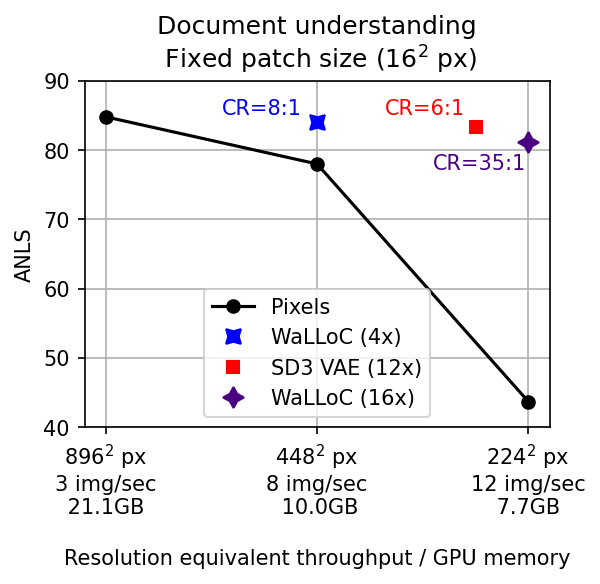

In [392]:
seq_length = [1, 2, 3]
pixels_anls = [43.7, 78.0, 84.8]
walloc_4x_anls = [np.nan, 84.1, np.nan]
walloc_16x_anls = [81.1, np.nan, np.nan]

fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(seq_length, pixels_anls, marker='o', label='Pixels', color='black')
ax = plt.gca()
ax.plot(seq_length, walloc_4x_anls, marker=(4, 1, 45), label='WaLLoC (4x)', color='blue', markersize=10, linestyle='none')
ax.plot(1.25, 83.386, marker=(4, 0, 45), label='SD3 VAE (12x)', color='red', markersize=8, linestyle='none')
ax.plot(seq_length, walloc_16x_anls, marker=(4, 1, 0), label='WaLLoC (16x)', color='indigo', markersize=10, linestyle='none')
ax.legend(loc='lower center')

ax.text(2.45, 86, 'CR=8:1', color='blue', va='center')
ax.text(1.45, 78, 'CR=35:1', color='indigo', va='center')
ax.text(1.68, 86, 'CR=6:1', color='red', va='center')

ax.set_title('Document understanding\n Fixed patch size ($16^2$ px)')
ax.set_xlabel('\nResolution equivalent throughput / GPU memory')
ax.set_ylabel('ANLS')
ax.set_ylim([40,90])
ax.grid(True)
ax.set_xticks(seq_length)
ax.set_xticklabels(['$224^2$ px \n12 img/sec\n 7.7GB ', '$448^2$ px \n8 img/sec\n 10.0GB', '$896^2$ px \n3 img/sec\n 21.1GB '])
ax.invert_xaxis()

fig.savefig("doc.svg")

CUDA:0 IS FREE

CUDA:1 IS FREE

CUDA:2 IS FREE

In [401]:
cf = "log_cuda:3.pth"
checkpoint = torch.load(cf,map_location="cpu")
print(checkpoint['i_epoch'])
-10*np.log10(checkpoint['valid_loss'][-1])

26


21.276010103746408